# Intento 3: Estudio, limpieza y análisis descriptivo

Data set: 'ds_salaries.csv'

Nombre: Bruno Caro

Fecha: 23-06-2025


In [474]:
# Librerías y conexión a los datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [475]:
# Conexión a los datos
path = 'ds_salaries.csv'
df = pd.read_csv(path)



## EDA

In [476]:
df.describe()
df.head()
df.tail()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [477]:
# revisión rápida de tipo de valores en cada dato
for i in list(df.columns):
    print(i.upper())
    print(df[i].unique())
    print('----------------------------\n')

WORK_YEAR
[2023 2022 2020 2021]
----------------------------

EXPERIENCE_LEVEL
['SE' 'MI' 'EN' 'EX']
----------------------------

EMPLOYMENT_TYPE
['FT' 'CT' 'FL' 'PT']
----------------------------

JOB_TITLE
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI

In [478]:
nulos = df[df.isnull().any(axis=1)] # con esto se obtiene cualquier valor nulo en cualquiera de las columans
nulos # no se obtienen valores nulos

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


**Principales hallazgos**

- work year, se debe trabajar en formato fecha o en str.
- remote ratio, puede ser cambiado al formato : Online, Híbrido o presencial. ya que hace referencia al porcentaje de las horas a la semana.


## Limpieza de datos

In [480]:
# Paso 1, Eliminación de registros duplicados.
    # Siguiendo las instrucciones del examen, "Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único."

df[df.duplicated() == True] # Se encontraron 1171 rows duplicados, quedando en un total de 2584 registros.
df = df.drop_duplicates()
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [481]:
# Paso 2, cambio de tipos de datos
df['work_year'] = df['work_year'].astype(str)

def tipopresencia(x)->str:
    if x == 100:
        tipo = 'On-line'
    elif x == 50:
        tipo = 'Hibrido'
    elif x == 0:
        tipo = 'Presencial'
    else:
        tipo = np.nan
    return tipo

df['remote_ratio'] = df['remote_ratio'].apply(tipopresencia)
df[df['remote_ratio'].isna()]


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   object
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   object
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(2), object(9)
memory usage: 242.2+ KB


## Visualización exploratoria de los datos

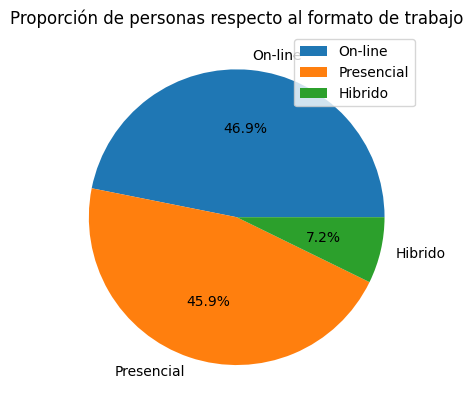

In [483]:
# Univariada 1: proporcipón de personas en sus tipos de contratos
data = df['remote_ratio'].value_counts()

lab = list(data.index)
plt.pie(data, labels=lab, autopct= '%1.1f%%')
plt.title('Proporción de personas respecto al formato de trabajo')
plt.legend()
plt.show()


La mayoría de las personas o registros que se encuentran en el data set, trabajan en formato On-line, representando un 46.9% del total. Mientras que un 45.9% trabaja de forma presencial. finalment, tan solo un 7.2% del total trabaja den formato hibrido.

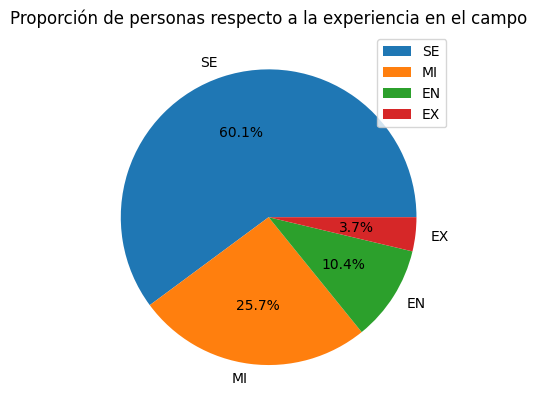

In [484]:
# Univariada 2: Proporción de personas respecto a la experiencia en el campo
data = df['experience_level'].value_counts()
lab = list(data.index)

plt.pie(data, labels=lab, autopct= '%1.1f%%')
plt.title('Proporción de personas respecto a la experiencia en el campo')
plt.legend()
plt.show()

En el Gráfico anterior se aprecia que la mayoria de las personas registradas en el set de datos corresponden a la categoría SE (Senior), segido de la categoria MI, EN, EX respectivamente.

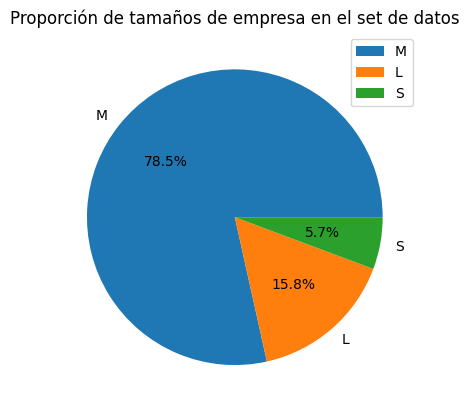

In [485]:
# Univariada 3: Proporción de tamaños de empresa en el set de datos
data = df['company_size'].value_counts()
lab = list(data.index)

plt.pie(data, labels=lab, autopct= '%1.1f%%')
plt.title('Proporción de tamaños de empresa en el set de datos')
plt.legend()
plt.show()

En el gráfico anterior se evidencia que la gran mayoria de las empresas del data set corresponden a medianas (Asumiendo claro que 'M' significa mediana) representado por un 78.5% del total de registros.

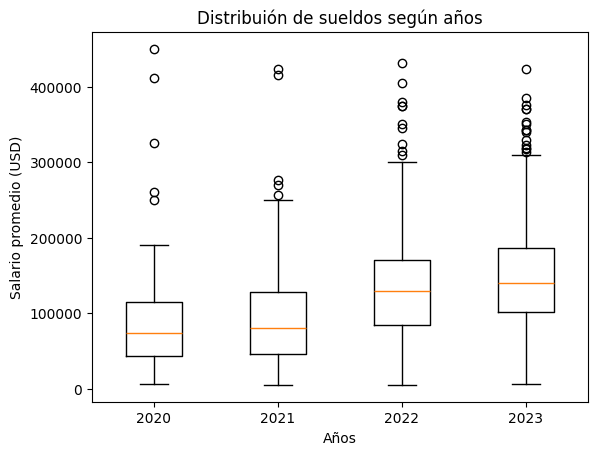

In [486]:
# Multivariado 1: Boxplot para los sueldos, agru

data = df.loc[:, ['work_year', 'salary', 'salary_currency', 'salary_in_usd']]
y20 = data[data['work_year'] == '2020']
y21 = data[data['work_year'] == '2021']
y22 = data[data['work_year'] == '2022']
y23 = data[data['work_year'] == '2023']

plt.boxplot([y20['salary_in_usd'], #boxplot 2020
             y21['salary_in_usd'], #boxplot 2021
             y22['salary_in_usd'], #boxplot 2022
             y23['salary_in_usd']],#boxplot 2023
             labels= ['2020', '2021', '2022', '2023'])
plt.title('Distribuión de sueldos según años')
plt.xlabel('Años')
plt.ylabel('Salario promedio (USD)')
plt.show()


Gracias al gráfico anterior, se puede apreciar como ha evolucionado el sueldo independiente del cargo, tamaño de la empresa o experiencia de las personas o registros del data set. se ve un clara tendencia del aumento del los sueldos debido a la alta necesidad de roles en el mundo de los datos.

Al mismo tiempo, se ve una gran cantidad de outliers, esto debido a que son casos en los que los ingresos son extremadamente altos. Reforzando la tesis de que hay una necesidad de talento en el mercado de data science y las empresas estan dispuestas a pagar por ese conocimiento.

En este caso no se eliminan los outliers debido a que sirven para demostrar como se comportan los datos.

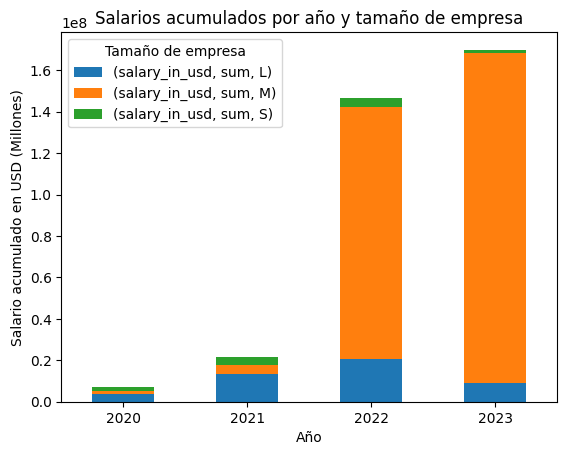

In [487]:
# Multivariado 2: Evolución de sueldos a través de los años explicado por el tamaño de empresa.
data = df.groupby(['work_year', 'company_size']).agg({'salary_in_usd':['sum']}).unstack() # saco la data que quiero
data.plot(kind='bar', stacked=True) # lo ploteo directamente del dataframe

# lo configuro
plt.xlabel('Año')
plt.ylabel('Salario acumulado en USD (Millones)')
plt.title('Salarios acumulados por año y tamaño de empresa')
plt.legend(title='Tamaño de empresa')
plt.xticks(rotation=0)
plt.show()

Del gráfico anteior, se puede apreciar que el aumento en los sueldos se originó principalmente en las empresas medianas, esto puede ser explicado por medio de estrategias empresariales para mantener su competitividad en el mercado, y para lograrlo, se traduce en inversión de talento para cumplir con este objetivo. Muy ligado al gráfico anterior 'Distribución de sueldos segun años'.

In [488]:
# Resumen descriptivo de las variables numericas del dataset
df.describe()

# Ambas datos corresponden a variables de sueldos, pero la que explica de manera mpas estandarizada es 'salary_in_usd' debido a que transforma
#   las diferentes divisas a usd. permitiendo la comparación entre distintos datos.

,salary,salary_in_usd
count,2.584000e+03,2584.000000
mean,2.103653e+05,133409.280186
std,8.080375e+05,67136.837329
min,6.000000e+03,5132.000000
25%,9.000000e+04,84975.000000
50%,1.346300e+05,130000.000000
75%,1.825625e+05,175000.000000
max,3.040000e+07,450000.000000


## Conclusión Final

Tras todo el análisis anterior realizado, se obtienen los siguientes puntos claves:

- Crecimiento del trabajo remoto e híbrido:
La alta proporción de trabajo online y presencial sugiere que el modelo híbrido aún tiene espacio para crecer.Las empresas podrían invertir más en infraestructura y políticas flexibles que permitan esta forma de trabajo, adaptándose a las nuevas demandas laborales.

- Demanda de profesionales senior:
La predominancia de perfiles Senior indica que la experiencia sigue siendo muy valorada. Para el futuro, será clave fomentar la capacitación continua y el desarrollo profesional para asegurar un flujo constante de talento preparado.

- Importancia de las empresas medianas:
Dado que las medianas empresas representan la mayoría y están impulsando incrementos salariales, ellas serán actores estratégicos en el mercado. Es importante entender sus necesidades y retos para apoyar su crecimiento y competitividad.

- Tendencia al aumento salarial:
El crecimiento salarial refleja la valorización de los roles relacionados con datos. Se espera que esta tendencia continúe, por lo que las empresas deberán planificar sus presupuestos y estrategias de retención de talento para no perder competitividad.

- Atención a la heterogeneidad del mercado:
La presencia de outliers salariales evidencia desigualdad y oportunidades especiales. En el futuro, podría ser necesario diseñar políticas que balanceen la equidad salarial con la atracción de talento clave.
